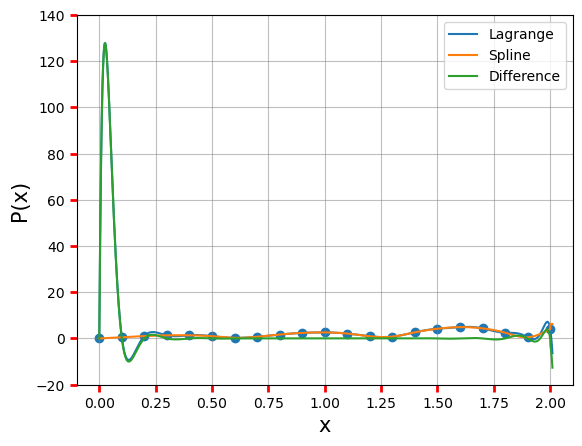

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.grid()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,20)

#полином Лагранжа
class razn(object): #разность двух элементов
    def __init__(self, x, xi, xj):
        self.raz = xi
        self.vich = xj
        
    def op(self, x, xi):
        if(xi == '.'):
            self.raz = x
        return self.raz - self.vich
    
class proizved(object): #произведение 20-ти элементов(числетель и знаменатель Q)
    def __init__(self,x,xi,arr):
        self.tmp_arr = [i for i in range(20)] #20
        for i in range(20):
            tmp = razn(x,xi,arr[i]);
            self.tmp_arr[i] = tmp.op(x,xi)

    def mul(self):
        tmp = 1
        for i in range(20): #20
            tmp *= self.tmp_arr[i]
        return tmp
def mk_poly(x, rangelist,data): #задание полинома
    chisl = [i for i in range(21)]
    znam = [i for i in range(21)]
    Q = [i for i in range(21)]
    for i in range(21): #числитель
        k = 0
        arr = [i for i in range(20)]
        for j in range(21):
            if(i != j):
                arr[k] = rangelist[j]
                k+=1
        tmp = proizved(x,'.',arr) #x
        chisl[i] = tmp.mul()
    for i in range(21): #знаменатель
        k = 0
        arr = [i for i in range(20)]
        for j in range(21):
            if(i != j):
                arr[k] = rangelist[j]
                k+=1
        tmp = proizved(0,rangelist[i],arr)
        znam[i] = tmp.mul()
    for i in range(21):
        Q[i] = chisl[i]/znam[i]
    ans = 0
    for i in range(21):
        ans += Q[i]*data[i]
    return ans
    

rangelist = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
data = [0, 0.529847, 1.027775, 1.346477, 1.356512, 0.986714, 0.257137, 0.706391, 1.684295, 2.404336, 2.606626, 2.11956, 0.927692, 0.789339, 2.664212, 4.203824, 4.900323, 4.370876, 2.493172, 0.502452, 4.019803]

#интерполирование сплайнами
h = 0.1 #шаг сетки

#метод прогонки для поиска C
A_prog = [0.1 for i in range(0,19)]
B_prog = [0.1 for i in range(0,19)]
C_prog = [0.4 for i in range(0,19)]
F_prog = [0.0 for i in range(0,19)]
alpha = [0.0 for i in range(0,20)]
beta = [0.0 for i in range(0, 20)]
C = [0.0 for i in range(0, 21)]
for i in range(1,20):
    F_prog[i-1] = 6*(data[i-1] - 2*data[i] + data[i+1])/h
alpha[0] = 0
beta[0] = 0
alpha[19] = 0.0
beta[19] = 0.0
 
# Прямой проход
for i in range(1, 20):
    alpha[i] = -B_prog[i-1] / (A_prog[i-1] * alpha[i-1] + C_prog[i-1]);
    beta[i] = (F_prog[i-1] - A_prog[i-1]*beta[i-1]) / (A_prog[i-1] * alpha[i-1] + C_prog[i-1]);

#Обратный проход   
C[20] = 0
C[0] = 0
for i in range(19, 0, -1):
    C[i] = (beta[i] + alpha[i]*C[i+1])

#коэффициенты сплайна
#C.insert(0,0.0)
A = [0.0 for i in range(21)]
B = [0.0 for i in range(21)]
D = [0.0 for i in range(21)]
for i in range(1,21):
    A[i] = data[i]
for i in range(1,21):
    D[i] = (C[i] - C[i-1])/h
for i in range(1,21):
    B[i] = 0.5*h*C[i] - (h**2)*D[i]/6 + (data[i] - data[i-1])/h

#графическое представление
x = [0]
y = [0]
x2 = [0]
y2 = [0] 
x3 = [0]
y3 = [0]
step = 0.001
i = 0.001
k = 1
while i <= 2.01:
    x.append(i)
    x2.append(i)
    x3.append(i)
    y.append(mk_poly(x[k],rangelist,data))
    tmp = 1
    while(i > rangelist[tmp] and i <= 2.0):
        tmp += 1
    y2.append(A[tmp] + B[tmp]*(i-rangelist[tmp]) + C[tmp]*((i-rangelist[tmp])**2)/2 + D[tmp]*((i-rangelist[tmp])**3)/6)
    y3.append(y[k]-y2[k])
    i+=step
    k+=1
plt.xlabel('x', fontsize=15)
plt.ylabel('P(x)', fontsize=15)
plt.xlim(-0.1, 2.1)
plt.ylim(-20, 140)
plt.tick_params(axis='both', direction='out', length=5, width=2, labelcolor='black', colors='r', grid_color='gray', grid_alpha=0.5)
plt.scatter(rangelist,data)
plt.plot(x,y, label='Lagrange')
plt.plot(x2,y2, label='Spline')
plt.plot(x3,y3, label='Difference')
plt.legend()
